# 載入套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#  step.1 載入功課需要的資料

In [2]:

data=pd.read_csv("C:/Users/x5748/OneDrive/桌面/data/Concrete_Data.csv")
x=data
x=x.iloc[:,0:-1].values
y=data.iloc[:,-1].values

# step.2 計算相關係數並用熱度圖呈現

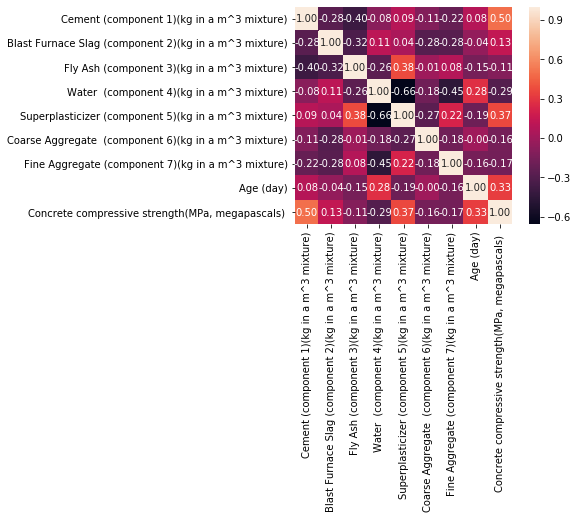

In [3]:
####step.2
cm=np.corrcoef(data.values.T)
hm=sns.heatmap(cm,cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              annot_kws={'size':10},
               yticklabels=data.keys(),
              xticklabels=data.keys())

# step.3 step.4 
## 進行標準化->分成訓練集與測試集->訓練模型->觀察是否有異號
## 發現slr.coef_[3]為異號

In [4]:
sc_x=StandardScaler()
x_std=sc_x.fit_transform(x)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)
slr=LinearRegression()
slr.fit(x_train,y_train)
print(slr.coef_)

[ 0.1106433   0.0950681   0.07641073 -0.15826736  0.31377028  0.01605109
  0.01117207  0.11007863]


# step.5
# 進行資料預處理(刪除部分特徵)
## 想法:共線性為變數間存在相關關係，因此需要減少特徵，以減低共線性的產生，打算先從回歸係數低的特徵著手刪除，這樣可以有效降低模型複雜度，也不會與原本模型能夠解釋的變因差異過大

In [333]:
data=pd.read_csv("C:/Users/x5748/OneDrive/桌面/data/Concrete_Data.csv")
x=data
x=x.iloc[:,0:-1].values
y=data.iloc[:,-1].values
sc_x=StandardScaler()
x_std=sc_x.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)
slr=LinearRegression()
slr.fit(x_train,y_train)
print(slr.coef_)
# all value is  positive

[ 0.1106433   0.0950681   0.07641073 -0.15826736  0.31377028  0.01605109
  0.01117207  0.11007863]


In [334]:
y_train_pred=slr.predict(x_train)
y_test_pred=slr.predict(x_test)

### 這裡可以看到在未刪除變數前的r^2。
### train_r^2=0592792
### test_r^2=0.656806

In [335]:
x=r2_score(y_train,y_train_pred)
y=r2_score(y_test,y_test_pred)
print("train_r2 is %f " % (x))
print("test_r2 is %f " % (y))
#train_r2<test_r2

train_r2 is 0.598547 
test_r2 is 0.656806 


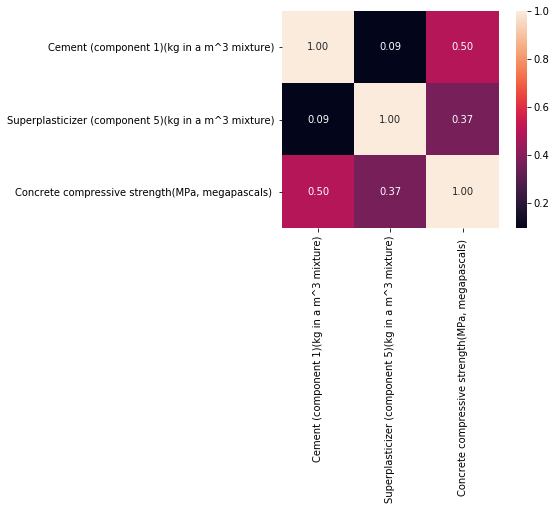

In [380]:
x=data
#x=x.drop(['Cement (component 1)(kg in a m^3 mixture)'],axis=1)
x=x.drop(['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],axis=1)
x=x.drop(['Fly Ash (component 3)(kg in a m^3 mixture)'],axis=1)
x=x.drop(['Water  (component 4)(kg in a m^3 mixture)'],axis=1)
#x=x.drop(['Superplasticizer (component 5)(kg in a m^3 mixture)'],axis=1)
x=x.drop(['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'],axis=1)
x=x.drop(['Fine Aggregate (component 7)(kg in a m^3 mixture)'],axis=1)
x=x.drop(['Age (day)'],axis=1)



cm=np.corrcoef(x.values.T)
hm=sns.heatmap(cm,cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              annot_kws={'size':10},
               yticklabels=x.keys(),
              xticklabels=x.keys())

In [381]:
x=x.iloc[:,0:-1].values
y=data.iloc[:,-1].values
sc_x=StandardScaler()
x_std=sc_x.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)
slr=LinearRegression()
slr.fit(x_train,y_train)
print(slr.coef_)

[0.07246468 0.80618346]


In [382]:
y_train_pred=slr.predict(x_train)
y_test_pred=slr.predict(x_test)

In [383]:
x=r2_score(y_train,y_train_pred)
y=r2_score(y_test,y_test_pred)
print("train_r2 is %f " % (x))
print("test_r2 is %f " % (y))


train_r2 is 0.334001 
test_r2 is 0.394138 


### Fine Aggregate迴歸係數最低=0.01117207=>刪除=>發現r^2變動很小(0.653746 )
### Coarse Aggregate迴歸係數最低=0.00782481=>刪除=>發現r^2變動很小(0.656804)
### Fly Ash迴歸係數最低=0.06431602=>刪除=>發現r^2變動(0.608829)
### Blast Furnace Slag迴歸係數最低=0.05911819=>刪除=>發現r^2變動(0.524111)
### Cement迴歸係數最低=0.06391099=>刪除=>發現r^2變動過大(0.297861)，而且產生過度適配=>改而刪除迴歸係數第二低的Water=>發現r^2變動(0.504417)
### Cement迴歸係數最低=0.0650456=>刪除=>發現r^2變動過大(0.273086)，而且產生過度適配=>改而刪除迴歸係數第二低的Age=>發現r^2變動(0.394138)
### 此時，發現迴歸係數與相關係數皆為同號

## --------------------------------------------------

## 比較所得模型與未做預處理理之模型的優劣
### 經過欲處理的模型，複雜度與原本的模型相比降低很多(8變數->2變數)，可以減少共線性的疑慮，雖然經過欲處理的模型r^2從(0.65->0.39)但卻能用兩個變數卻能解釋39%的資料。
